**# Add required modules**

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import*
import numpy as np


Add a table to the environment

In [5]:
table = pd.read_csv("laptop_price.csv" , encoding='latin-1')

Viewing the table and general review of the table

In [6]:
table.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [7]:
table.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [8]:
table.shape

(1303, 13)

In [9]:
table.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [10]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


Checking the deleted values

In [11]:
table.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

Display company chart by price

C:\Users\number_one\AppData\Local\Temp\ipykernel_10492\2968034296.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


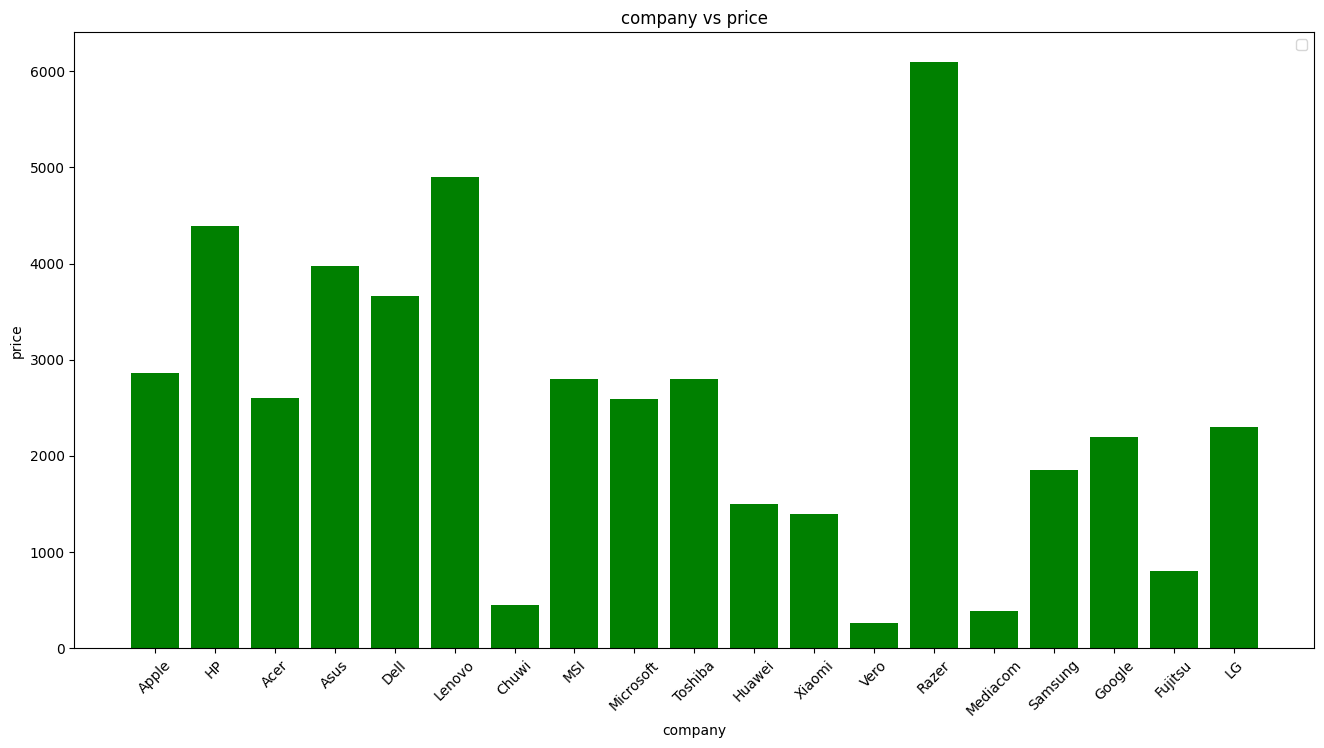

In [12]:
plt.figure(figsize=(16,8))
plt.bar(table['Company'] , table['Price_euros'] , color = 'green')
plt.xticks(x=table['Company']  , size=10,rotation=45)
plt.title("company vs price")
plt.xlabel("company")
plt.ylabel("price")
plt.legend()
plt.show()

Separation of CPU speed and brand

In [13]:
table['Cpu_Brand'] = table['Cpu'].apply(lambda x: x.split()[0])
table['Cpu_Speed_GHz'] = table['Cpu'].apply(lambda x :float(x.split()[-1].replace('GHz' , ' ')))
table[['Cpu', 'Cpu_Brand', 'Cpu_Speed_GHz']].head()

,Cpu,Cpu_Brand,Cpu_Speed_GHz
0,Intel Core i5 2.3GHz,Intel,2.3
1,Intel Core i5 1.8GHz,Intel,1.8
2,Intel Core i5 7200U 2.5GHz,Intel,2.5
3,Intel Core i7 2.7GHz,Intel,2.7
4,Intel Core i5 3.1GHz,Intel,3.1


Comparison of CPU brands

C:\Users\number_one\AppData\Local\Temp\ipykernel_10492\1046338633.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=table['Cpu_Brand'], y=table['Price_euros'], palette='Purples')


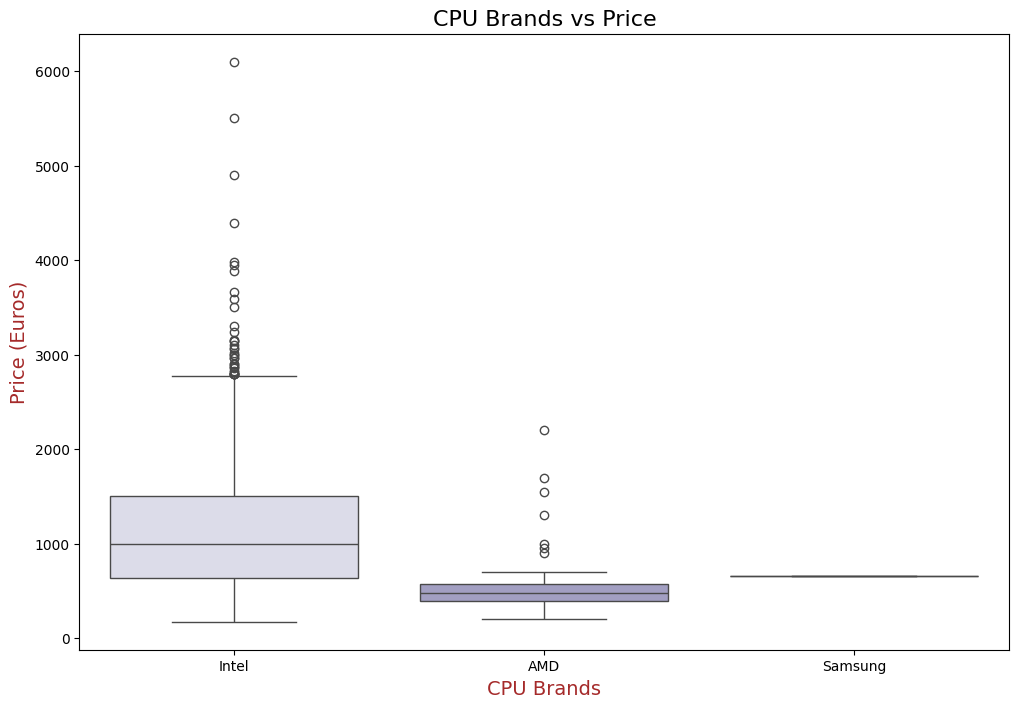

In [14]:

plt.figure(figsize=(12, 8))
sns.boxplot(x=table['Cpu_Brand'], y=table['Price_euros'], palette='Purples')
plt.title("CPU Brands vs Price", fontsize=16)
plt.xlabel("CPU Brands", fontsize=14, color="brown")
plt.ylabel("Price (Euros)", fontsize=14, color="brown")
plt.show()

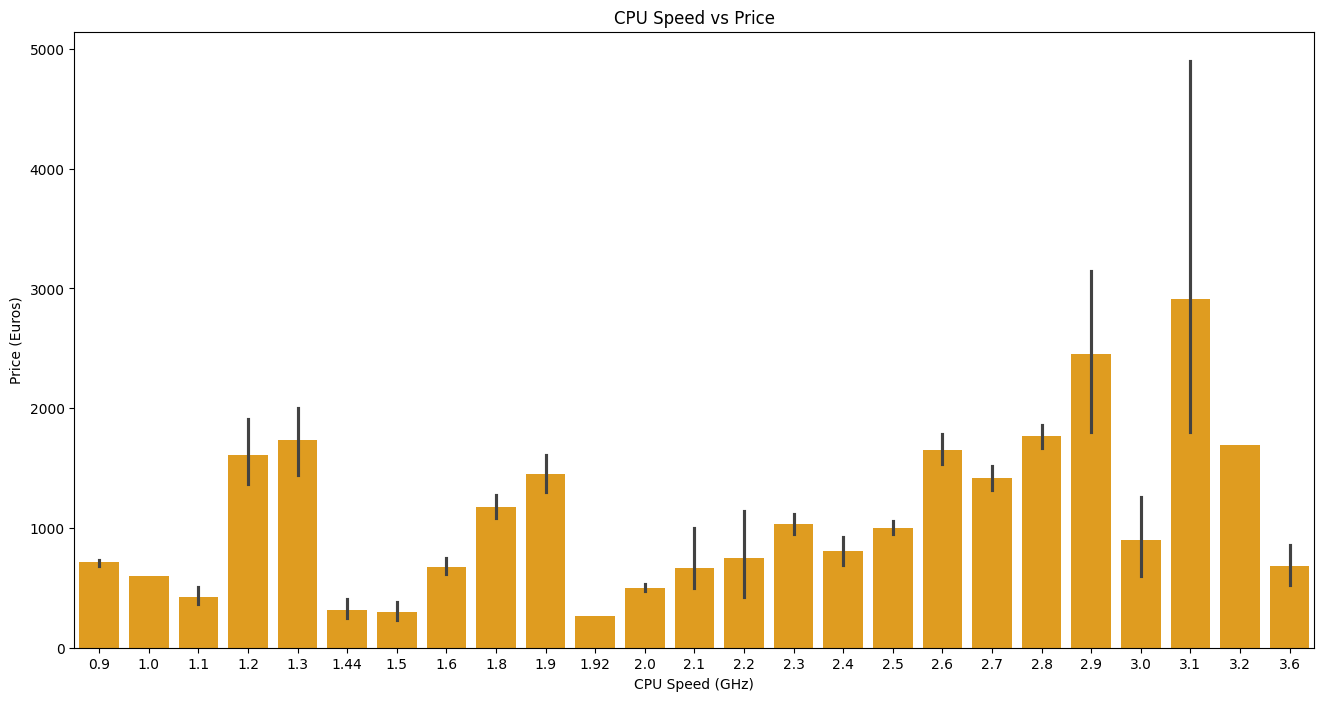

In [15]:

plt.figure(figsize=(16,8))
sns.barplot(x=table['Cpu_Speed_GHz'], y=table['Price_euros'], color='orange')
plt.title('CPU Speed vs Price')
plt.xlabel('CPU Speed (GHz)')
plt.ylabel('Price (Euros)')
plt.show()


Bar graph of laptop memory vs. price

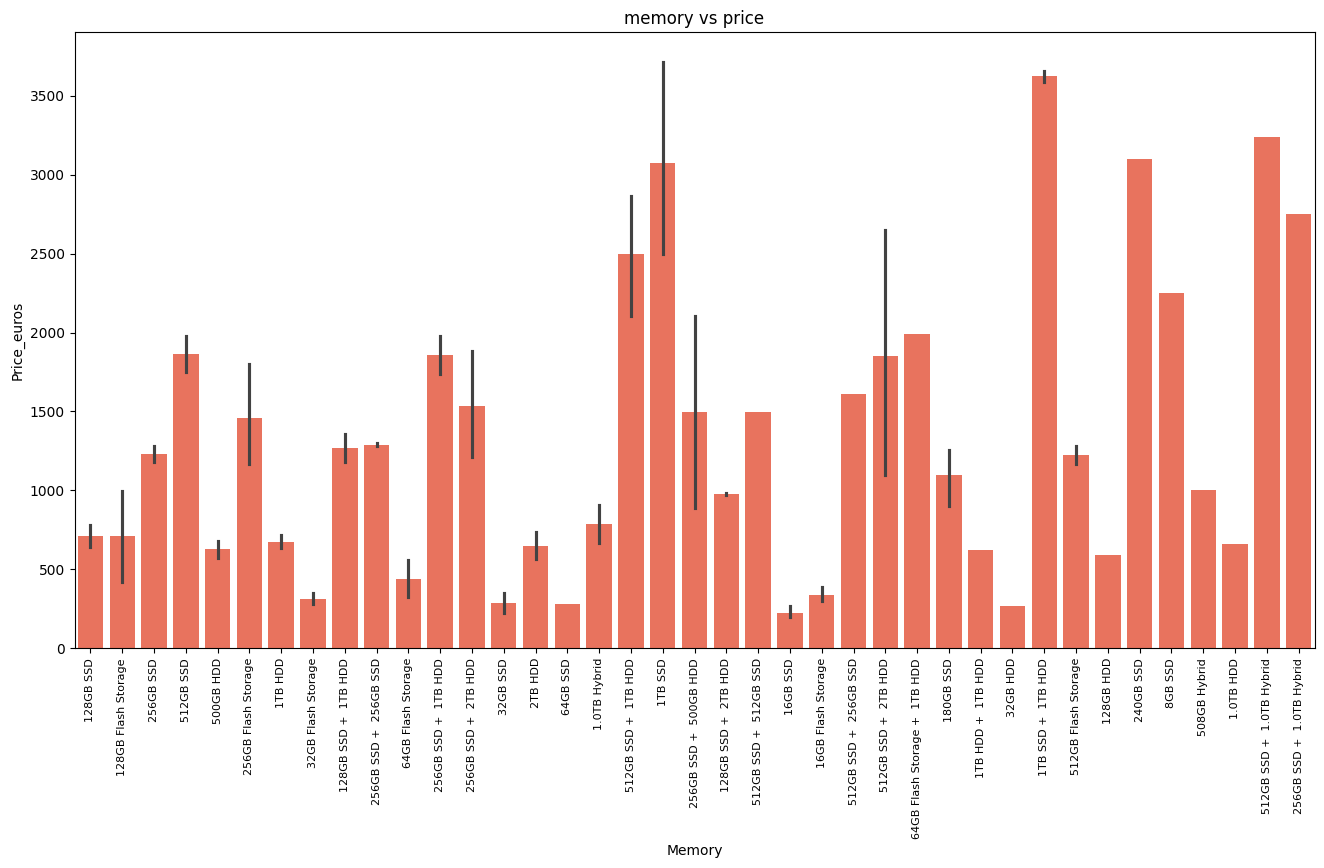

In [16]:
plt.figure(figsize=(16,8))
sns.barplot(x=table['Memory'] , y=table['Price_euros'] , color='Tomato')
plt.xticks(rotation=90 , size=8)
plt.title("memory vs price")
plt.show()

Product pie chart for top 5 products

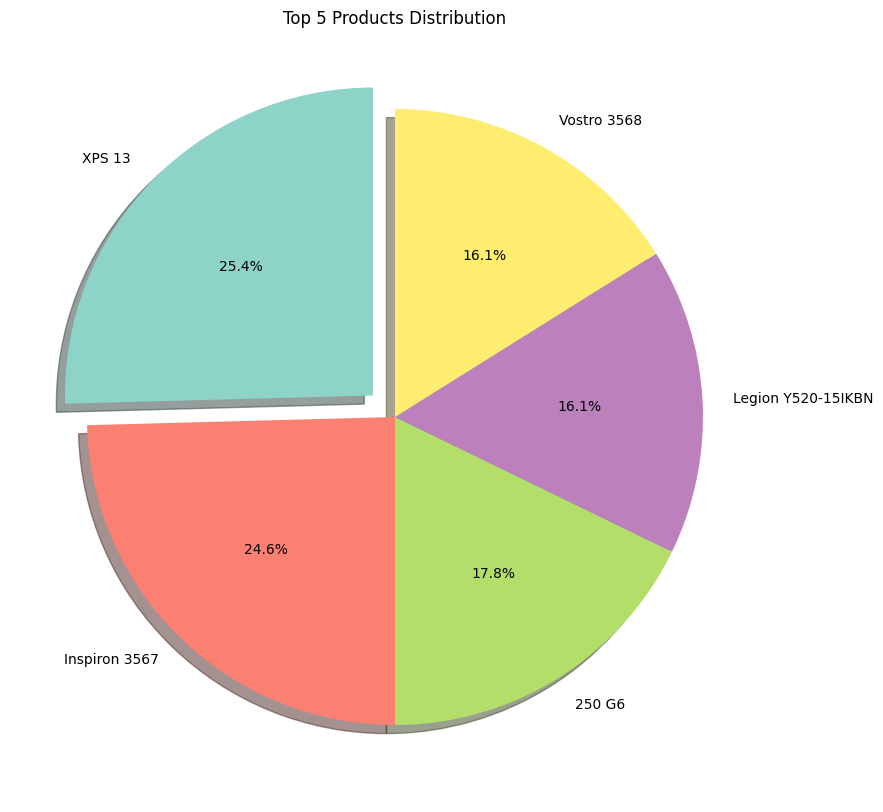

In [17]:
plt.figure(figsize=(10,10))
table['Product'].value_counts().nlargest(5).plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3',shadow=True,explode=[0.1,0,0,0,0])
plt.title('Top 5 Products Distribution')
plt.ylabel('')  
plt.show()



Donut chart for comparing types of laptops

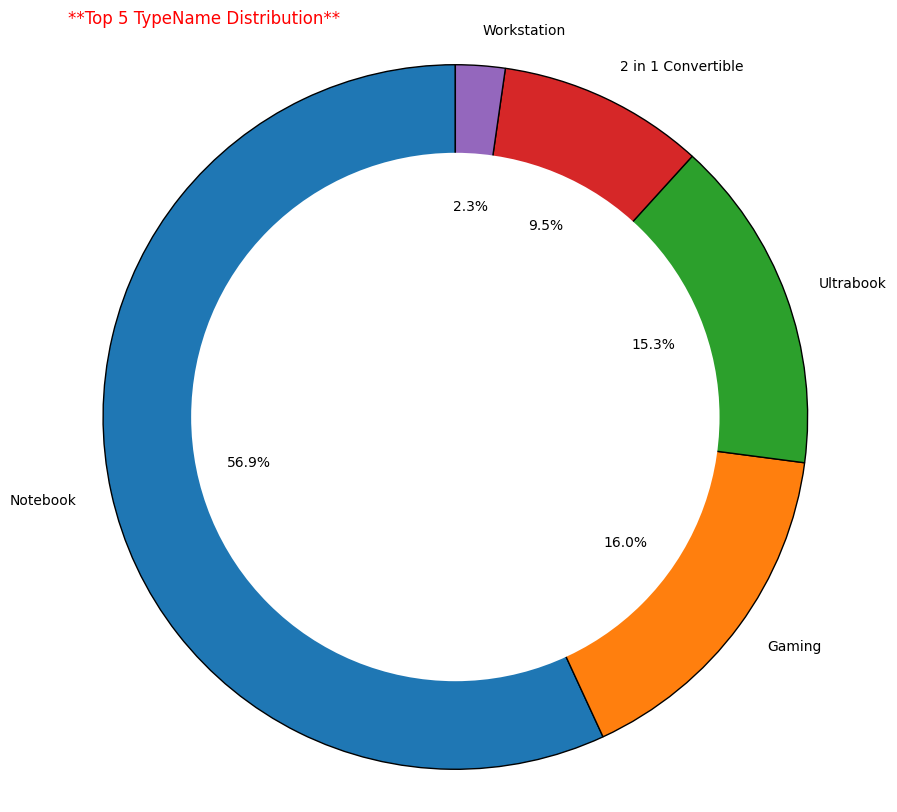

In [18]:
plt.figure(figsize=(10,10))
typename_counts = table['TypeName'].value_counts().nlargest(5)
plt.pie(typename_counts, labels=typename_counts.index, autopct="%.1f%%", startangle=90, wedgeprops={'edgecolor': 'black'})

circle = plt.Circle(xy=(0,0), radius=0.75, facecolor="white")
plt.gca().add_artist(circle)
plt.title("**Top 5 TypeName Distribution**" , loc= "left" , color='red')
plt.axis("equal")
plt.show()



Converting non-numerical values ​​into numbers and calculating the correlation matrix

In [19]:
select_bject = table[['Cpu' , "Gpu" , 'Company' , 'Ram' , 'Memory' , 'Product']]
select_bject = select_bject.apply(lambda x:pd.factorize(x)[0])
select_price=table[['Price_euros']]
corr_matrix = pd.concat([select_bject , select_price],axis=1)
corr_matrix = corr_matrix.corr()

Correlation matrix heat map

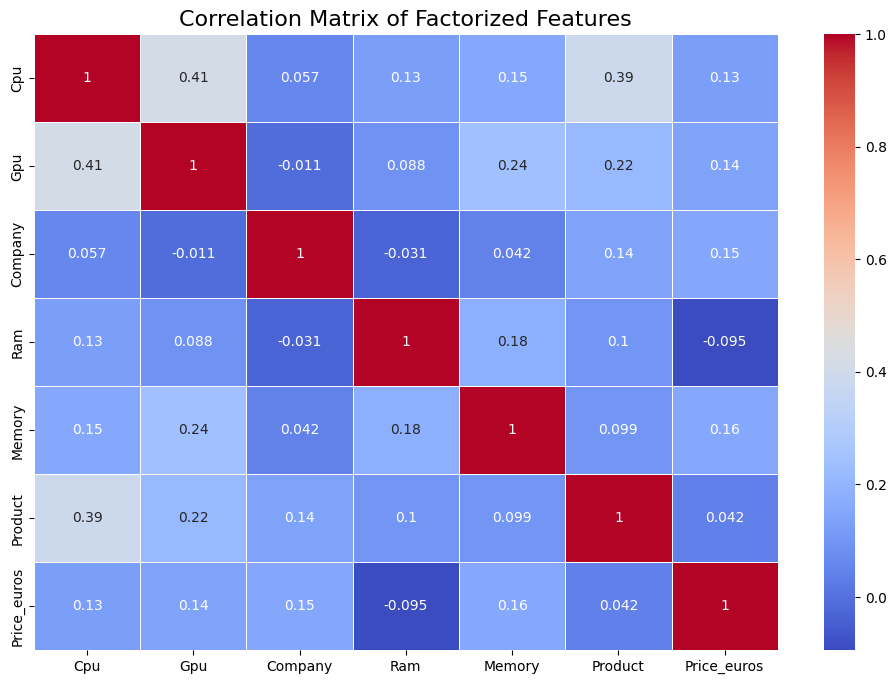

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix , annot=True , cmap='coolwarm' , linewidths=0.5)
plt.title('Correlation Matrix of Factorized Features', fontsize=16)
plt.show()

## Create a model using the XG Boost model

In [104]:
select_bject = table[['Cpu', 'Gpu', 'Company', 'Ram', 'Memory', 'Product']]
select_bject = select_bject.apply(lambda x: pd.factorize(x)[0])
select_price = table[['Price_euros']]

In [150]:
X = select_bject[['Cpu', 'Gpu' ,'Company' ,'Ram' ,'Memory' ,'Product']]  

y = select_price['Price_euros']  


In [151]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [156]:
y_pred = xgb_model.predict(x_test)

Display model results

In [157]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R2:", R2)

MAE: 229.11673551245212
MSE: 131968.267020553
RMSE: 363.2743687910737
R2: 0.7401823677528474


*The results show that the accuracy of the model is 74% and its error is between 230 and 360 euros, but it is good for this data set.*